In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
categorical_val=[]
continous_val=[]
for column in data.columns:
    if len(data[column].unique()) <=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

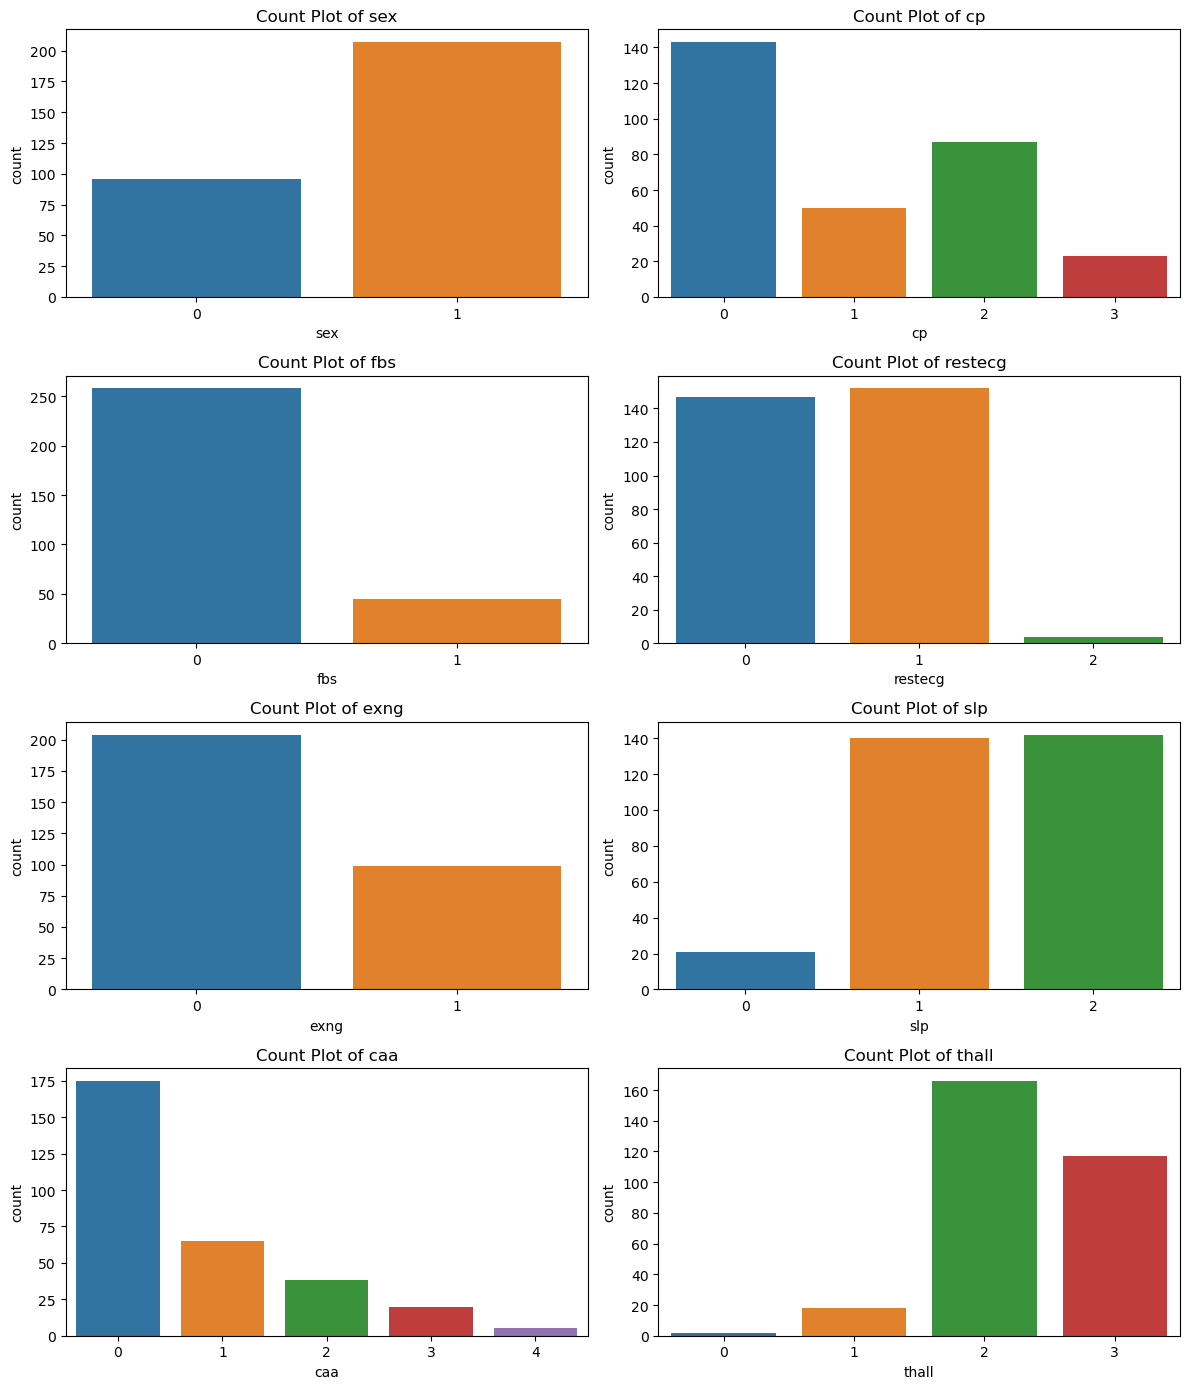

In [4]:
categorical_val.remove('output')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
for i, feature in enumerate(categorical_val):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=data, ax=axes[row, col])
    axes[row, col].set_title(f"Count Plot of {feature}")
plt.tight_layout()
plt.show()

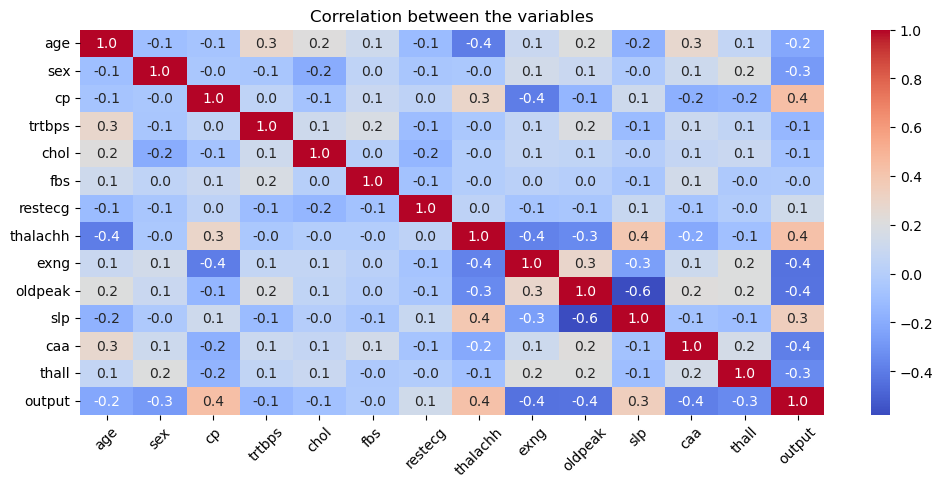

In [5]:
# correlation matrixs
plt.subplots(figsize=(12,5))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".1f")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)
plt.show()

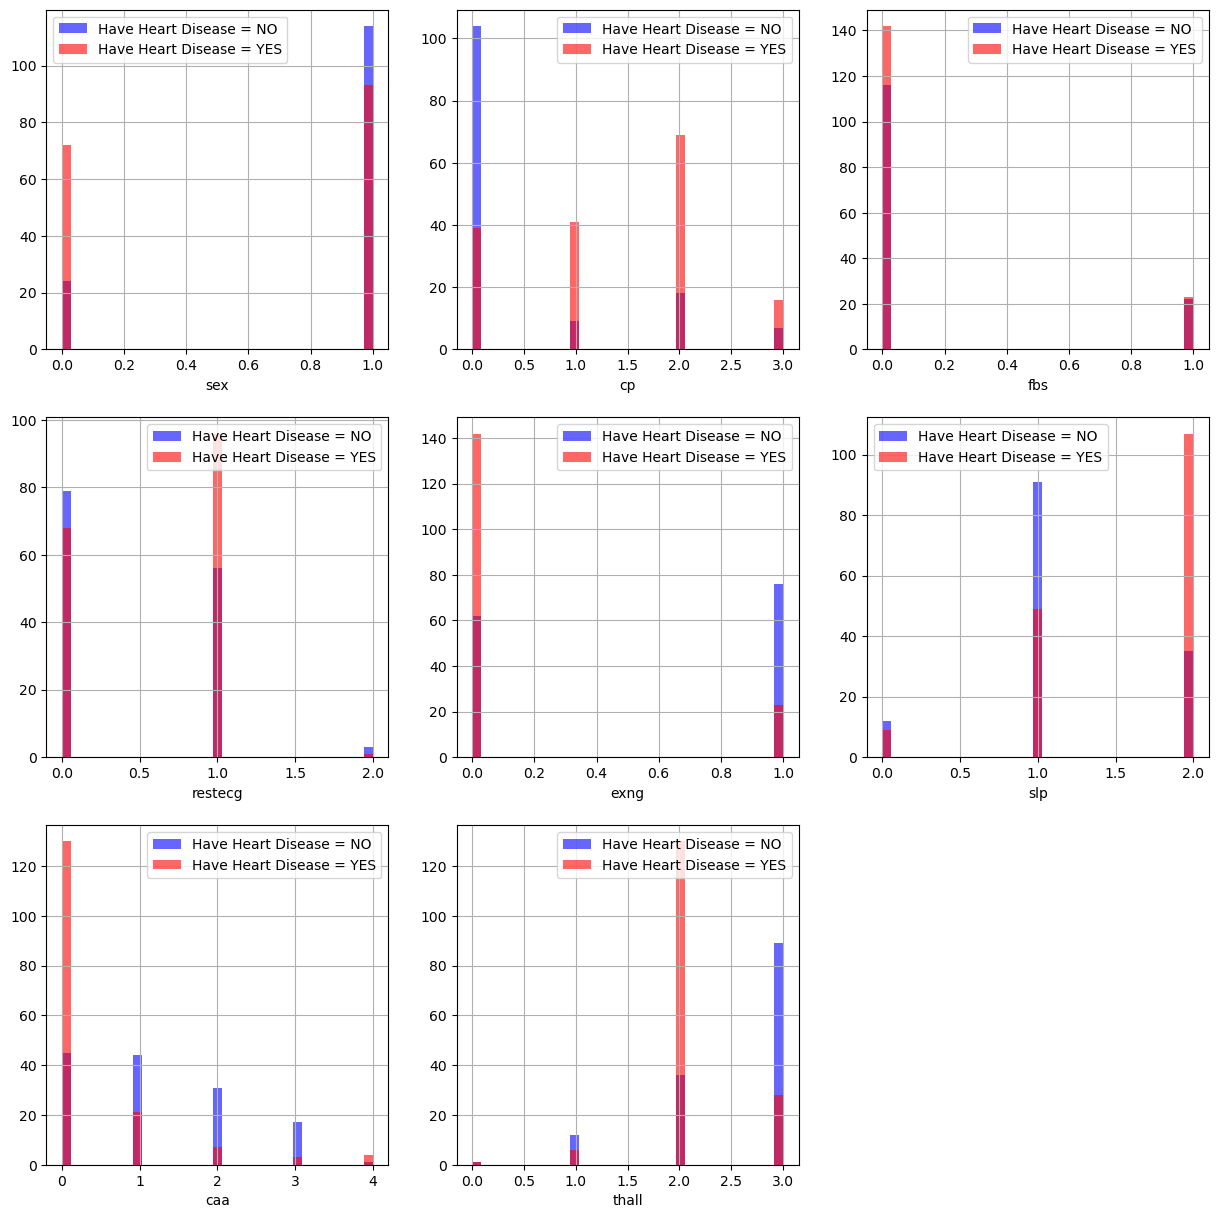

In [6]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["output"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["output"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)